In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("Mental Health and Technology Survey.csv")

In [3]:
Data.head(10)

,Age,Gender,Country,state,self_employed,family_history,work_interfere,<5,5_to_25,26-100,...,benefits,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23,Unnamed: 24
0,31,Male,United States,NC,1,0,0,1,0,0,...,0,0,3,0,0,0,1,1,NaN,NaN
1,46,Male,United States,MA,0,0,3,0,0,1,...,2,2,1,0,0,1,1,2,NaN,NaN
2,35,Female,United States,CA,0,1,1,0,1,0,...,2,2,1,0,1,1,2,2,NaN,NaN
3,37,Male,United Kingdom,NaN,0,0,2,0,1,0,...,0,0,2,0,0,0,1,0,NaN,NaN
4,32,Male,United Kingdom,NaN,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,NaN,NaN
5,40,Female,United States,WI,0,0,2,1,0,0,...,2,2,1,0,0,1,1,0,NaN,NaN
6,27,Male,United States,NY,0,0,1,0,1,0,...,0,2,5,0,0,1,2,2,NaN,NaN
7,35,Male,United States,TX,0,0,1,0,0,0,...,2,2,5,0,2,1,2,2,NaN,NaN
8,30,Male,United States,IN,0,0,2,0,0,1,...,1,0,1,0,0,1,0,0,NaN,NaN
9,22,Male,United States,TX,0,1,3,0,1,0,...,0,2,2,0,0,1,0,0,NaN,NaN


In [5]:
Coast_Dict = {'CO':'West', 'ID':'West', 'MT':'West', 'NV':'West', 'UT':'West', 'WY':'West',
                  'AK':'West', 'CA':'West', 'HI': 'West', 'OR':'West','WA':'West','FL':'East', 'GA':'East', 'SC':'East',
                  'NC':'East', 'VA':'East','MD':'East','DE':'East', 'NJ':'East','NY':'East', 'CT':'East','RI':'East','MA':'East',
                  'NH':'East', 'ME':'East', 'OH':'Midwest', 'MI':'Midwest','IN':'Midwest',
                  'IL':'Midwest','WI':'Midwest','MN':'Midwest','IA':'Midwest','MO':'Midwest','KS':'Midwest','NE':'Midwest',
                  'SD':'Midwest','ND':'Midwest', 'OK':'South','TX':'South', 'AR':'South','LA':'South','KY':'South',
                  'TN':'South','MS':'South','AL':'South', 'GA':'South','WV':'South'}
Data['Coast'] = Data['state'].map(Coast_Dict)
Data.head(15)

,Age,Gender,Country,state,self_employed,family_history,work_interfere,<5,5_to_25,26-100,...,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23,Unnamed: 24,Coast
0,31,Male,United States,NC,1,0,0,1,0,0,...,0,3,0,0,0,1,1,NaN,NaN,East
1,46,Male,United States,MA,0,0,3,0,0,1,...,2,1,0,0,1,1,2,NaN,NaN,East
2,35,Female,United States,CA,0,1,1,0,1,0,...,2,1,0,1,1,2,2,NaN,NaN,West
3,37,Male,United Kingdom,NaN,0,0,2,0,1,0,...,0,2,0,0,0,1,0,NaN,NaN,NaN
4,32,Male,United Kingdom,NaN,0,0,0,0,1,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5,40,Female,United States,WI,0,0,2,1,0,0,...,2,1,0,0,1,1,0,NaN,NaN,Midwest
6,27,Male,United States,NY,0,0,1,0,1,0,...,2,5,0,0,1,2,2,NaN,NaN,East
7,35,Male,United States,TX,0,0,1,0,0,0,...,2,5,0,2,1,2,2,NaN,NaN,South
8,30,Male,United States,IN,0,0,2,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,Midwest
9,22,Male,United States,TX,0,1,3,0,1,0,...,2,2,0,0,1,0,0,NaN,NaN,South


# Decision Trees

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

C:\Users\aditm\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Male Dataset

In [7]:
Male = Data.loc[Data['Gender'] == "Male", :]
Male

,Age,Gender,Country,state,self_employed,family_history,work_interfere,<5,5_to_25,26-100,...,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23,Unnamed: 24,Coast
0,31,Male,United States,NC,1,0,0,1,0,0,...,0,3,0,0,0,1,1,NaN,NaN,East
1,46,Male,United States,MA,0,0,3,0,0,1,...,2,1,0,0,1,1,2,NaN,NaN,East
3,37,Male,United Kingdom,NaN,0,0,2,0,1,0,...,0,2,0,0,0,1,0,NaN,NaN,NaN
4,32,Male,United Kingdom,NaN,0,0,0,0,1,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
6,27,Male,United States,NY,0,0,1,0,1,0,...,2,5,0,0,1,2,2,NaN,NaN,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,46,Male,United States,MD,0,1,2,0,0,0,...,1,1,0,1,1,1,2,NaN,NaN,East
945,25,Male,United Kingdom,NaN,0,1,2,0,0,0,...,2,5,0,2,1,2,2,NaN,NaN,NaN
946,30,Male,Netherlands,NaN,0,0,2,0,0,0,...,0,1,0,0,0,2,2,NaN,NaN,NaN
947,32,Male,United States,OR,0,0,0,0,0,0,...,1,4,0,2,0,0,1,NaN,NaN,West


In [12]:
Young = Male.loc[Male['Age'] <= 16, :]
Older = Male.loc[Male['Age'] >= 52, :]
Young
Male_2 = Male.drop([225, 362])
Male_2

,Age,Gender,Country,state,self_employed,family_history,work_interfere,<5,5_to_25,26-100,...,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23,Unnamed: 24,Coast
0,31,Male,United States,NC,1,0,0,1,0,0,...,0,3,0,0,0,1,1,NaN,NaN,East
1,46,Male,United States,MA,0,0,3,0,0,1,...,2,1,0,0,1,1,2,NaN,NaN,East
3,37,Male,United Kingdom,NaN,0,0,2,0,1,0,...,0,2,0,0,0,1,0,NaN,NaN,NaN
4,32,Male,United Kingdom,NaN,0,0,0,0,1,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
6,27,Male,United States,NY,0,0,1,0,1,0,...,2,5,0,0,1,2,2,NaN,NaN,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,46,Male,United States,MD,0,1,2,0,0,0,...,1,1,0,1,1,1,2,NaN,NaN,East
945,25,Male,United Kingdom,NaN,0,1,2,0,0,0,...,2,5,0,2,1,2,2,NaN,NaN,NaN
946,30,Male,Netherlands,NaN,0,0,2,0,0,0,...,0,1,0,0,0,2,2,NaN,NaN,NaN
947,32,Male,United States,OR,0,0,0,0,0,0,...,1,4,0,2,0,0,1,NaN,NaN,West


In [54]:
Decision_Tree_Model_Seek_Help = Male_2.drop(['Gender', 'Country', 'Coast', 'Unnamed: 23', 'Unnamed: 24', 'state','treatment','coworkers','supervisor'], axis = 1)
x = Decision_Tree_Model_Seek_Help.drop(['seek_help'], axis = 1)
y = Decision_Tree_Model_Seek_Help.seek_help
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=2000)

In [55]:
Seek_Help_DecisionTree_Class_Model = DecisionTreeClassifier()
Seek_Help_DecisionTree_Class_Model.fit(x_train, y_train)
y_pred = Seek_Help_DecisionTree_Class_Model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.608955223880597

In [58]:
!pip install graphviz

In [57]:
from sklearn import tree
import graphviz
Seek_Help = tree.DecisionTreeClassifier()
Seek_Help = Seek_Help.fit()

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [11]:
Male_Age = Male_2['Age']
Quantiles = Male_Age.quantile([.25, .5, .75])
Average = Male_Age.mean()
Lower_Quantile = Quantiles[0.25]
Upper_Quantile = Quantiles[0.75]
Inter_Quantile = Upper_Quantile - Lower_Quantile
Lower_Bound = Lower_Quantile - (1.5*Inter_Quantile)
Upper_Bound = Upper_Quantile + (1.5*Inter_Quantile)
print("Male Data Summary Data")
print("----------------------")
print(f"The average age is: {Average}")
print(f"The lower quantile is: {Lower_Quantile}")
print(f"The upper quantile is: {Upper_Quantile}")
print(f"The inter-quantile range is: {Inter_Quantile}")
print(f"The median age is: {Quantiles[0.5]}")
print(f"People under the age of {Lower_Bound} are young.")
print(f"People over the age of {Upper_Bound} are older.")

Male Data Summary Data
----------------------
The average age is: 33.16935483870968
The lower quantile is: 27.0
The upper quantile is: 37.0
The inter-quantile range is: 10.0
The median age is: 32.0
People under the age of 12.0 are young.
People over the age of 52.0 are older.


Text(0.5, 1.0, 'Male Tech Employees By Country')

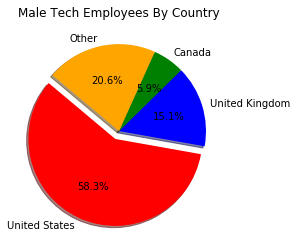

In [12]:
#Pie Chart
Countries = Male['Country'].value_counts()
Countries
Labels = ["United States", "United Kingdom", "Canada", "Other"]
Sizes = [435, 113, 44, 154]
Color = ["red", "blue", 'green', 'orange']
Explode = (0.1, 0, 0, 0)
plt.pie(Sizes, explode=Explode, labels=Labels, colors=Color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male Tech Employees By Country")

Text(0, 0.5, 'Number of Tech Employees')

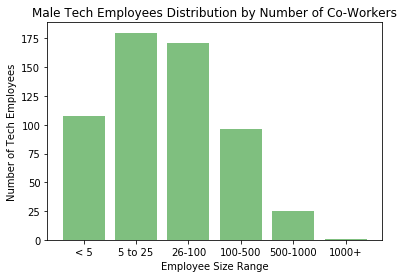

In [13]:
Men_Employees = Male_2['no_employees'].value_counts()
X = ['< 5', '5 to 25', '26-100', '100-500', '500-1000', '1000+']
Y = [108, 180, 171, 96, 25, 1]
plt.bar(X, Y, color='g', alpha=0.5, align= 'center')
plt.title('Male Tech Employees Distribution by Number of Co-Workers')
plt.xlabel("Employee Size Range")
plt.ylabel("Number of Tech Employees")

In [7]:
Men_United_States = Male_2.loc[Male_2['Country'] == "United States", :]
Men_United_States

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Coast
0,31,Male,United States,NC,1,0,0,< 5,1,1,0,0,3,0,0,0,1,1,East
1,46,Male,United States,MA,0,0,3,26-100,1,1,2,2,1,0,0,1,1,2,East
6,27,Male,United States,NY,0,0,1,5 to 25,0,1,0,2,5,0,0,1,2,2,East
7,35,Male,United States,TX,0,0,1,More than 1000,1,1,2,2,5,0,2,1,2,2,South
8,30,Male,United States,IN,0,0,2,26-100,0,1,1,0,1,0,0,1,0,0,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,38,Male,United States,NY,0,1,1,More than 1000,0,0,2,2,4,0,2,1,0,2,East
937,35,Male,United States,IN,0,1,3,More than 1000,0,0,2,2,4,0,2,1,0,1,Midwest
940,29,Male,United States,OH,0,0,0,26-100,0,1,0,0,1,1,1,0,1,2,Midwest
943,46,Male,United States,MD,0,1,2,100-500,1,1,1,1,1,0,1,1,1,2,East


In [15]:
Men_United_States_Value_Counts = Men_United_States['Coast'].value_counts()
Men_United_States_Value_Counts

West       150
Midwest    106
South       73
East        72
Name: Coast, dtype: int64

Text(0.5, 0, 'Coast')

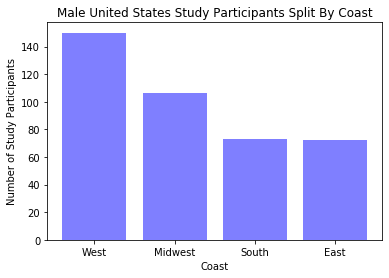

In [8]:
#Bar Chart
X = ['West', 'Midwest', 'South','East']
Y = [150, 106, 73, 72]
plt.bar(X, Y, color='b', alpha=0.5, align='center')
plt.title("Male United States Study Participants Split By Coast")
plt.ylabel("Number of Study Participants")
plt.xlabel("Coast")

In [6]:
#Correlation
Men_Correlation = Male_2.corr()
Men_Correlation

,Age,self_employed,family_history,work_interfere,<5,5_to_25,26-100,100-500,500-1000,1000+,...,tech_company,benefits,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23
Age,1.000000,0.029198,-0.010368,0.040287,0.013788,-0.030543,-0.074516,-0.026802,0.046192,0.097060,...,0.009805,0.117484,0.123459,-0.041516,0.040461,0.094668,0.086442,-0.002146,-0.032072,NaN
self_employed,0.029198,1.000000,-0.025577,0.048249,0.565670,-0.023002,-0.135620,-0.113311,-0.072200,-0.196264,...,0.052891,-0.277528,0.017794,0.100524,0.076637,-0.146542,-0.008963,0.079659,0.039899,NaN
family_history,-0.010368,-0.025577,1.000000,0.301485,0.009996,-0.054265,-0.005126,0.083502,-0.035579,0.000708,...,-0.033126,0.121473,0.082166,0.005436,0.068500,0.058911,0.353136,0.028703,0.018584,NaN
work_interfere,0.040287,0.048249,0.301485,1.000000,0.048298,0.025629,-0.010648,-0.029332,-0.076654,0.000329,...,-0.006571,-0.035882,0.085021,0.033417,0.106742,-0.108098,0.491623,0.011643,-0.055153,NaN
<5,0.013788,0.565670,0.009996,0.048298,1.000000,-0.232798,-0.225115,-0.158610,-0.076840,-0.219125,...,0.089755,-0.331524,0.031983,0.077264,0.055866,-0.171342,0.003252,0.064892,0.033285,NaN
5_to_25,-0.030543,-0.023002,-0.054265,0.025629,-0.232798,1.000000,-0.308615,-0.217443,-0.105342,-0.300403,...,0.131524,-0.200213,-0.142155,0.084131,-0.100924,-0.216420,-0.063576,0.003331,0.056726,NaN
26-100,-0.074516,-0.135620,-0.005126,-0.010648,-0.225115,-0.308615,1.000000,-0.210266,-0.101865,-0.290488,...,0.017604,0.012819,-0.018586,-0.018059,-0.027577,-0.106912,0.015131,0.018090,0.004599,NaN
100-500,-0.026802,-0.113311,0.083502,-0.029332,-0.158610,-0.217443,-0.210266,1.000000,-0.071772,-0.204671,...,-0.056938,0.117029,0.035966,-0.021471,-0.000732,0.063632,0.028387,0.022003,0.021641,NaN
500-1000,0.046192,-0.072200,-0.035579,-0.076654,-0.076840,-0.105342,-0.101865,-0.071772,1.000000,-0.099155,...,-0.038286,0.098952,-0.016933,-0.063514,-0.035070,0.065524,-0.010880,-0.019517,0.013597,NaN
1000+,0.097060,-0.196264,0.000708,0.000329,-0.219125,-0.300403,-0.290488,-0.204671,-0.099155,1.000000,...,-0.167327,0.337893,0.116820,-0.089270,0.100616,0.397751,0.029333,-0.086255,-0.114968,NaN


# Female

In [7]:
Female = Data.loc[Data['Gender'] == "Female", :]
Female

,Age,Gender,Country,state,self_employed,family_history,work_interfere,<5,5_to_25,26-100,...,benefits,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23,Unnamed: 24
2,35,Female,United States,CA,0,1,1,0,1,0,...,2,2,1,0,1,1,2,2,NaN,NaN
5,40,Female,United States,WI,0,0,2,1,0,0,...,2,2,1,0,0,1,1,0,NaN,NaN
14,23,Female,Australia,NaN,0,1,3,1,0,0,...,0,1,5,0,0,1,1,2,NaN,NaN
21,29,Female,United States,FL,0,0,2,0,0,1,...,2,2,1,1,0,1,1,1,NaN,NaN
22,25,Female,Canada,NaN,0,0,2,0,0,1,...,2,2,1,0,1,1,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,31,Female,United States,FL,0,1,3,0,0,1,...,0,0,2,1,0,1,0,0,NaN,NaN
922,29,Female,United Kingdom,NaN,0,0,3,0,0,0,...,2,2,1,1,0,1,1,0,NaN,NaN
923,28,Female,United States,OR,0,0,1,0,1,0,...,2,2,5,0,2,1,1,1,NaN,NaN
932,42,Female,United States,WA,0,1,2,0,0,1,...,2,2,1,0,0,1,1,1,NaN,NaN


In [8]:
Female_Correlation = Female.corr()
Female_Correlation

,Age,self_employed,family_history,work_interfere,<5,5_to_25,26-100,100-500,500-1000,1000+,...,tech_company,benefits,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Unnamed: 23
Age,1.000000,0.070440,-0.083116,-0.187453,0.121473,-0.125895,-0.004129,0.036780,0.144708,-0.116519,...,-0.197770,0.150224,0.085105,-0.018567,0.018896,0.118386,-0.036781,0.022004,0.044627,NaN
self_employed,0.070440,1.000000,-0.006655,0.093058,0.702874,-0.083561,-0.172507,-0.108741,-0.100781,-0.140047,...,0.140047,-0.333103,0.002877,0.126959,0.076477,0.021927,-0.095224,-0.035139,-0.020534,NaN
family_history,-0.083116,-0.006655,1.000000,0.057521,-0.052791,-0.088502,0.036033,0.005280,0.013987,0.064368,...,-0.111649,0.073111,-0.001825,-0.012415,0.099440,0.053949,0.140497,-0.099820,-0.006560,NaN
work_interfere,-0.187453,0.093058,0.057521,1.000000,0.114037,0.077793,0.077016,-0.027079,-0.192488,-0.074159,...,0.006802,-0.116353,0.036458,0.067375,0.226247,-0.141837,0.372953,0.100525,0.091178,NaN
<5,0.121473,0.702874,-0.052791,0.114037,1.000000,-0.153872,-0.201205,-0.177968,-0.117547,-0.209818,...,0.209818,-0.397693,-0.036845,0.054589,0.056613,-0.068442,-0.039591,0.009027,-0.030897,NaN
5_to_25,-0.125895,-0.083561,-0.088502,0.077793,-0.153872,1.000000,-0.219196,-0.193881,-0.128057,-0.228579,...,0.129068,-0.164726,-0.181604,0.106144,-0.010837,-0.171723,0.026308,0.162266,0.081089,NaN
26-100,-0.004129,-0.172507,0.036033,0.077016,-0.201205,-0.219196,1.000000,-0.253522,-0.167449,-0.298894,...,-0.008579,-0.017684,-0.001879,-0.040540,-0.080762,-0.094553,-0.032515,0.106353,0.021645,NaN
100-500,0.036780,-0.108741,0.005280,-0.027079,-0.177968,-0.193881,-0.253522,1.000000,-0.148111,-0.264374,...,-0.036322,0.047762,-0.128693,-0.093522,-0.001842,-0.144535,0.042609,-0.011365,0.000238,NaN
500-1000,0.144708,-0.100781,0.013987,-0.192488,-0.117547,-0.128057,-0.167449,-0.148111,1.000000,-0.174617,...,-0.111157,0.159842,0.048179,0.034659,0.045431,0.189950,-0.062599,-0.038796,0.021363,NaN
1000+,-0.116519,-0.140047,0.064368,-0.074159,-0.209818,-0.228579,-0.298894,-0.264374,-0.174617,1.000000,...,-0.152868,0.310294,0.264662,-0.028256,0.015345,0.291068,0.043924,-0.208342,-0.078576,NaN


Text(0.5, 1.0, 'Female Tech Employees By Country')

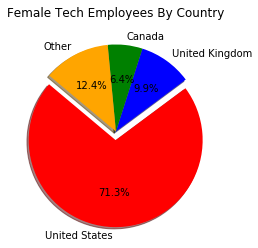

In [10]:
Female_Country = Female['Country'].value_counts()
X = ["United States", "United Kingdom", "Canada", "Other"]
Y = [144, 20, 13, 25]
Color = ["red", "blue", 'green', 'orange']
Explode = (0.1, 0, 0, 0)
plt.pie(Y, explode=Explode, labels=X, colors=Color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female Tech Employees By Country")

Text(0, 0.5, 'Number of Tech Employees')

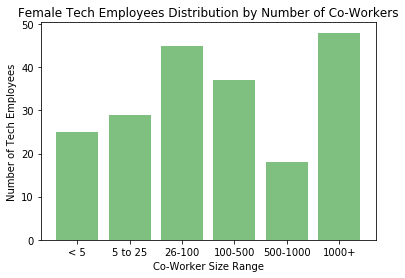

In [18]:
#Number of Employees 
Female_Employees = Female['no_employees'].value_counts()
X = ['< 5', '5 to 25', '26-100', '100-500', '500-1000', '1000+']
Y = [25, 29,45,37,18,48]
plt.bar(X, Y, color='g', alpha=0.5, align= 'center')
plt.title('Female Tech Employees Distribution by Number of Co-Workers')
plt.xlabel("Co-Worker Size Range")
plt.ylabel("Number of Tech Employees")

Text(0.5, 0, 'Coast')

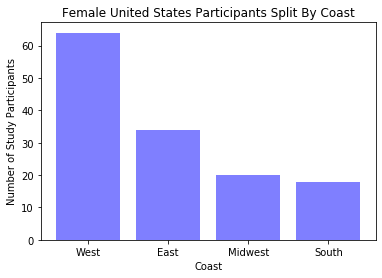

In [11]:
Female_United_States = Female.loc[Female['Country'] == "United States", :]
Female_United_States_Count = Female_United_States['Coast'].value_counts()
Female_United_States_Count
X = ['West', 'East', 'Midwest', 'South']
Y = [64,34,20,18]
plt.bar(X, Y, color='b', alpha=0.5, align='center')
plt.title("Female United States Participants Split By Coast")
plt.ylabel("Number of Study Participants")
plt.xlabel("Coast")

In [20]:
Female_Age = Female['Age']
Quantiles = Female_Age.quantile([.25, .5, .75])
Average = Female_Age.mean()
Lower_Quantile = Quantiles[0.25]
Upper_Quantile = Quantiles[0.75]
Inter_Quantile = Upper_Quantile - Lower_Quantile
Lower_Bound = Lower_Quantile - (1.5*Inter_Quantile)
Upper_Bound = Upper_Quantile + (1.5*Inter_Quantile)
print("Female Data Summary Data")
print("----------------------")
print(f"The average age is: {Average}")
print(f"The lower quantile is: {Lower_Quantile}")
print(f"The upper quantile is: {Upper_Quantile}")
print(f"The inter-quantile range is: {Inter_Quantile}")
print(f"The median age is: {Quantiles[0.5]}")
print(f"People under the age of {Lower_Bound} are young.")
print(f"People over the age of {Upper_Bound} are older.")

Female Data Summary Data
----------------------
The average age is: 30.806930693069308
The lower quantile is: 26.0
The upper quantile is: 34.0
The inter-quantile range is: 8.0
The median age is: 30.0
People under the age of 14.0 are young.
People over the age of 46.0 are older.


# Total Data

In [5]:
Data_2 = Data.loc[Data['Age'] >= 16, :]
Data_2

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,leave,obs_consequence,seek_help,treatment,coworkers,supervisor,Coast
0,31,Male,United States,NC,1,0,0,< 5,1,1,0,0,3,0,0,0,1,1,East
1,46,Male,United States,MA,0,0,3,26-100,1,1,2,2,1,0,0,1,1,2,East
2,35,Female,United States,CA,0,1,1,5 to 25,1,1,2,2,1,0,1,1,2,2,West
3,37,Male,United Kingdom,NaN,0,0,2,5 to 25,0,1,0,0,2,0,0,0,1,0,NaN
4,32,Male,United Kingdom,NaN,0,0,0,5 to 25,1,1,0,0,1,0,0,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,41,Female,Netherlands,NaN,1,0,1,< 5,1,1,1,2,4,0,2,1,2,2,NaN
945,25,Male,United Kingdom,NaN,0,1,2,More than 1000,0,0,2,2,5,0,2,1,2,2,NaN
946,30,Male,Netherlands,NaN,0,0,2,500-1000,0,1,1,0,1,0,0,0,2,2,NaN
947,32,Male,United States,OR,0,0,0,100-500,0,1,2,1,4,0,2,0,0,1,West


In [6]:
Total_Age = Data_2['Age']
Quantiles = Total_Age.quantile([.25, .5, .75])
Lower_Quantile = Quantiles[0.25]
Upper_Quantile = Quantiles[0.75]
Inter_Quantile = Upper_Quantile - Lower_Quantile
Lower_Bound = Lower_Quantile - (1.5*Inter_Quantile)
Upper_Bound = Upper_Quantile + (1.5*Inter_Quantile)
print("Total Subjects Data Summary Data")
print("----------------------")
print(f"The lower quantile is: {Lower_Quantile}")
print(f"The upper quantile is: {Upper_Quantile}")
print(f"The inter-quantile range is: {Inter_Quantile}")
print(f"The median age is: {Quantiles[0.5]}")
print(f"People under the age of {Lower_Bound} are young.")
print(f"People over the age of {Upper_Bound} are older.")

Total Subjects Data Summary Data
----------------------
The lower quantile is: 27.0
The upper quantile is: 36.0
The inter-quantile range is: 9.0
The median age is: 32.0
People under the age of 13.5 are young.
People over the age of 49.5 are older.


Text(0.5, 1.0, 'Total Tech Employees By Country')

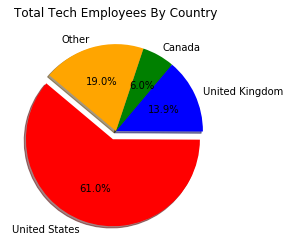

In [7]:
Total_Country = Data_2['Country'].value_counts()
X = ["United States", "United Kingdom", "Canada", "Other"]
Y = [578, 132, 57, 180]
Color = ["red", "blue", 'green', 'orange']
Explode = (0.1, 0, 0, 0)
plt.pie(Y, explode=Explode, labels=X, colors=Color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Tech Employees By Country")


Text(0.5, 0, 'Coast')

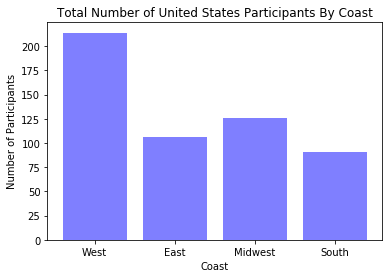

In [9]:
Total_United_States = Data_2.loc[Data_2['Country'] == "United States", :]
Total_United_States_Count = Total_United_States['Coast'].value_counts()
X = ['West', 'East', 'Midwest', 'South']
Y = [214,106,126,91]
plt.bar(X, Y, color='b', alpha=0.5, align='center')
plt.title("Total Number of United States Participants By Coast")
plt.ylabel("Number of Participants")
plt.xlabel("Coast")

Text(0, 0.5, 'Number of Tech Employees in Each Range')

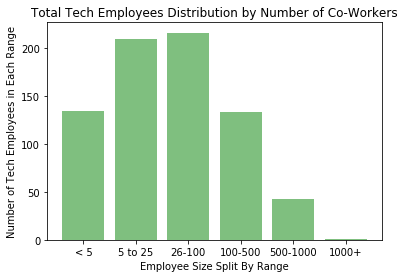

In [23]:
Total_Employees = Data_2['no_employees'].value_counts()
Total_Employees
X = ['< 5', '5 to 25', '26-100', '100-500', '500-1000', '1000+']
Y = [134, 209,216,133,43,1]
plt.bar(X, Y, color='g', alpha=0.5, align= 'center')
plt.title('Total Tech Employees Distribution by Number of Co-Workers')
plt.xlabel("Employee Size Split By Range")
plt.ylabel("Number of Tech Employees in Each Range")